BASIC OF MACHINE LEARNING

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('Datasets//Titanic.csv') 

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

In [7]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h2> Accuracy Test

In [9]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7412587412587412


<H2>Accuracy Result
<h3>When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now LEARNING

<h2> Feature Selection

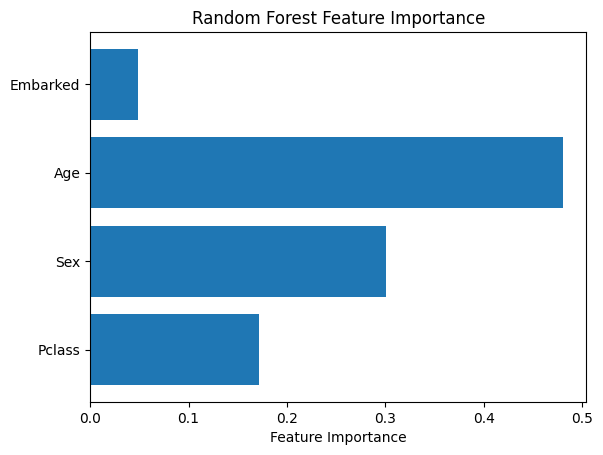

In [10]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

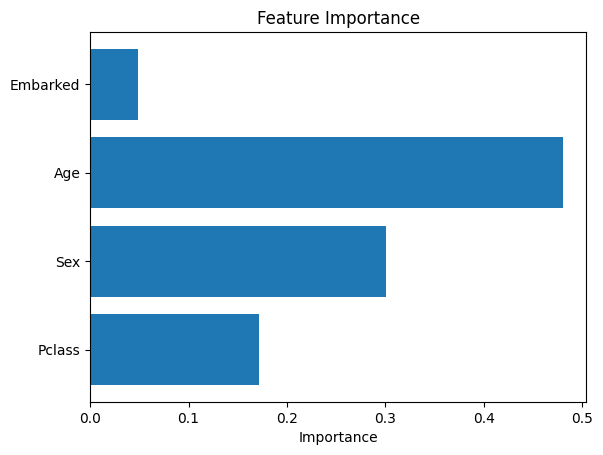

In [11]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()

<h2> CONFUSION MATRIX

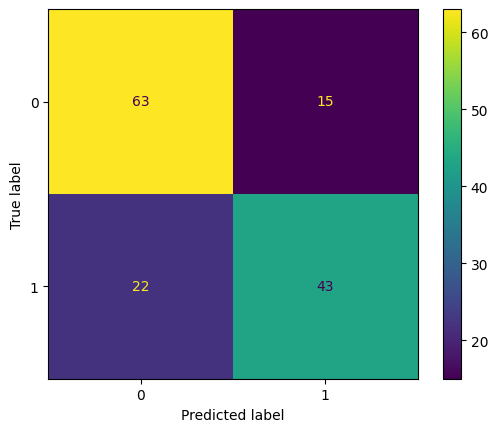

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<h2>Insight
<h3>The confusion matrix reveals the model’s strengths and weaknesses in classifying each category. High counts along the diagonal indicate that the model performs well for those classes, meaning predictions in those areas can be trusted for automated or high-confidence decisions.

<h2> Manual Testing

In [15]:
model.predict([[1, 2, 59, 0]])

array([1])

In [ ]:
if model.predict([[1, 2, 59,0]]) == [1]:
    print("Passenger likely survive")
elif model.predict([[1, 2, 59, 0]]) == [0]:
    print("Passenger unlikely to survive")
else:
    print("Invalid Result")